The Secretary Problem

An optimization problem explaining how to choose the best candidate

By: Ryan

The problem statement:
    
    You are a hiring manager at your company. The position for secretary has opened up, and you got 100 applicants for the job! Now all you need to do is find the best candidate for the job. The assumptions are simple
    
    1) Any candidate that you offer the job will accept it without thinking twice and the search is over
    2) Of all 100 candidates, none are equal in talent, they can all be ranked in order from best to worst (100 is the best and 1 is the worst)
    3) You must interview one candidate at a time, and once you pass on one to move on to interview the next, the     candidate that you pass on is gone forever and you cannot get them back to be hired
    
    Your job is to find the best candidate (ranked 100), so the question is at what point do you stop interviewing, and hire?

Step 1: The setup
    
    Here we simulate the hiring process. 
    
    We assume that the way we select will be to take a look at each candidate, pick one that we wish to stop at (say we stop at candidate 25 out of 100), then we take the next candidate that we find after the candiate we stopped at that is better than the best candidate that we have seen so far up to our stopping point.
    
    An example would be if we picked candidate 25 as our optimal stopping point, we would interview the first 25 candidates, make a mental note of which one was the best of the 25, and then we would keep interviwing until we found a candidate that was better than the best of the first 25 and immediately hire that person.
    
    We will solve this problem using 100,000 simulations for each of the 99 stopping positions that we have at our disposal, and see which stopping position had the highest success rate for finding the best candidate.

In [1]:
import numpy as np
import math
import random
import statistics
random.seed(333)


Total_Holder = []

for i in range(0,100000):
    
    All_Values = []
    Y = np.array(random.sample(range(1,101), 100)) #generates random array of 100 values from 1-100

    for i in range(1,100): #iterates through our array from index 0-98 (must see at least one candidate and the last 
                                #candidate won't work since we cannot use the "pick after" strategy)
        Grab = Y[0:i]         #Y[0:1] takes the first value in array, Y[0:2] takes the first two values...
        Max_Grab = max(Grab) #Identify the highest value (best candidate) seen so far

        Stopping_Value = []

        if max(Y[i:]) > Max_Grab: #Check and see if a better candidate even remains
            
            for v in Y[i:]: #Iterate through the remaining candidates not yet seen

                if v > Max_Grab: #If one does remain, proceed to capture all that are better in order 
                    Stopping_Value.append(v)

        else: #If one does not remain then take the last candidate that you see since you have no other choice
            Stopping_Value.append(Y[-1])
                                             #Now pick out the FIRST candidate that is better than the best one we saw in the first pool
        All_Values.append(Stopping_Value[0]) #Store the value of the selected candidate for each stopping position index 0-98
    
    Total_Holder.append(All_Values) #Store the arrays of candidate selection based on stopping positions

Matrix = np.column_stack(Total_Holder)#Stack them so that row one contains all candidate selections if we stopped
                                          #After the first candidate, and so on and so forth
    


Step 2:
    
    Now that we have a matrix that contains 100,000 sims of stopping and then selecting at each available position, it is time to see which one was the best. We do this by seeing the percent of the time that each position found the best candidate, then comparing all positions to see which one is the winner, and what the success rate is.

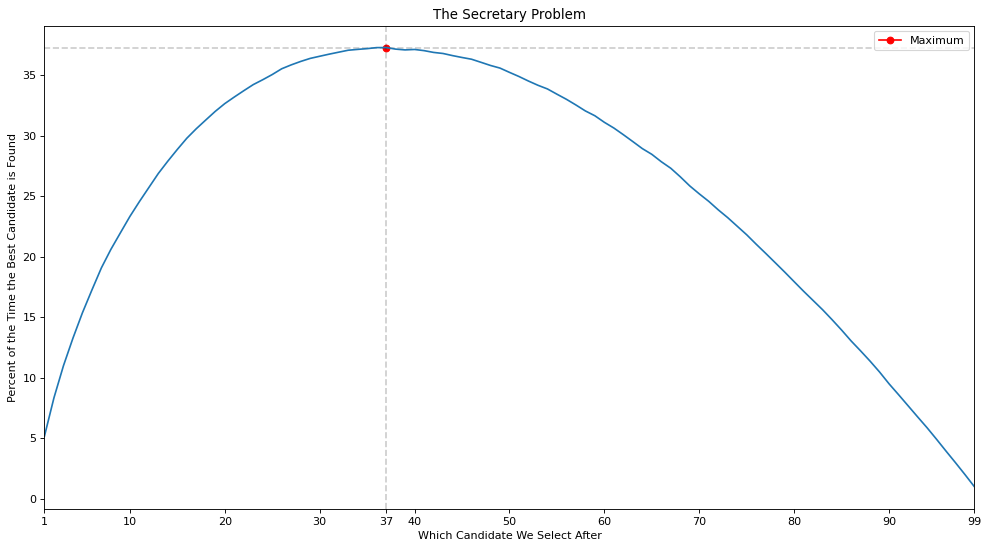

At position 37.0 there is a 37.0% chance of finding the best candidate


In [73]:
import matplotlib.pyplot as plt

Counter = []

for s in Matrix:
    
    s = list(s)
    Counter.append((s.count(100)/len(s))*100)    #Find the % of the time each stopping position finds the BEST candidate
    

x = np.linspace(1,len(Counter),len(Counter))
y = Counter

yunits = [i for i in range(0,round(max(y))+5,5)]

plt.figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
plt.title("The Secretary Problem")
plt.xlabel("Which Candidate We Select After")
plt.ylabel("Percent of the Time the Best Candidate is Found")


plt.plot(x[y.index(max(y))], max(y), '-ro', label = "Maximum")
plt.axvline(x=x[y.index(max(y))], color='black', linestyle='--', alpha = 0.2)
plt.axhline(y=max(y), color='black', linestyle='--', alpha = 0.2)

plt.xlim(1,99)
plt.xticks([1,10,20,30,x[y.index(max(y))],40,50,60,70,80,90,99])
plt.yticks([0,5,10,15,20,25,30,35,40])
plt.legend(loc="upper right")
 
plt.plot(x,y)
plt.show()

print("At position {} there is a {}% chance of finding the best candidate".format(x[y.index(max(y))],round(max(y),0)))


Result:


    The highest probability of finding the best candidate is found by making your selection after candidate 37, and it yields a 37% chance of getting the best candidate out of the group.

Step 3:
    
    Lets take a look at what our simulations tell us about how well we select overall when we are using the 37% stopping rule (stopping after candidate 37 out of 100 then selecting). We can do this by taking a look at the best candidate our process found the other 63% of the time where we did not find the best candidate.

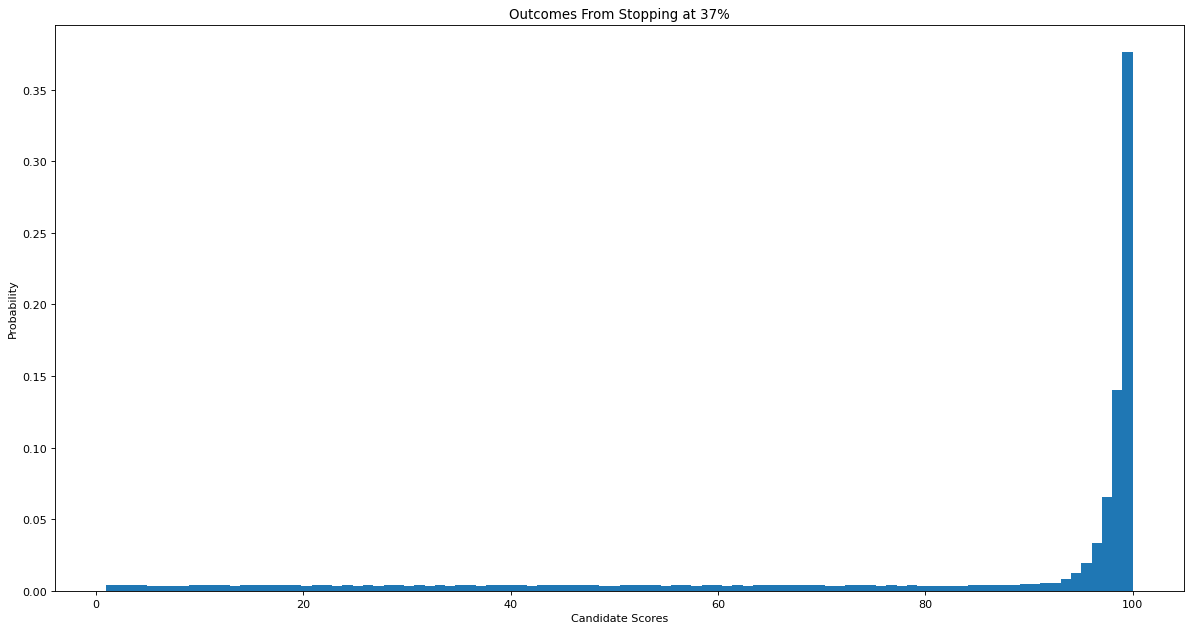

37% of total candidates sampled are best when stopping at 37%


In [26]:
x = (Matrix[36]) #Take a look at our simulated data when we stopped searching after candidate 37 (37% through)
Best = (len([i for i in x if (i)==100])/len(x))

num_bins = 100

fig, ax = plt.subplots(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')

n, bins, patches = ax.hist(x, num_bins, density=True)

plt.xlabel('Candidate Scores')
plt.ylabel('Probability')
ax.set_title(r'Outcomes From Stopping at 37%')

fig.tight_layout()
plt.show()

print("{}% of total candidates sampled are best when stopping at 37%".format(round(Best*100),0))


Result:
    
    Using the 37% stopping method, it looks like we have an equal probability of winding up with a candidate that is anywhere from the worst, to just outside the top 10. We see an exponential increase in finding candidates that are inside the top 10 ranking when using this method.

Step 4:
    
    Now that we know the optimal stopping point to maximize our probability of finding the best candidate, lets see if we can find the optimal stopping point where we find wind up with the highest average candidate score. This is a little safer of a strategy, because even if we aren't maximizing our ceiling, we are raising our floor to prevent winding up with terrible candidates (after all a 37% success rate is not that great).

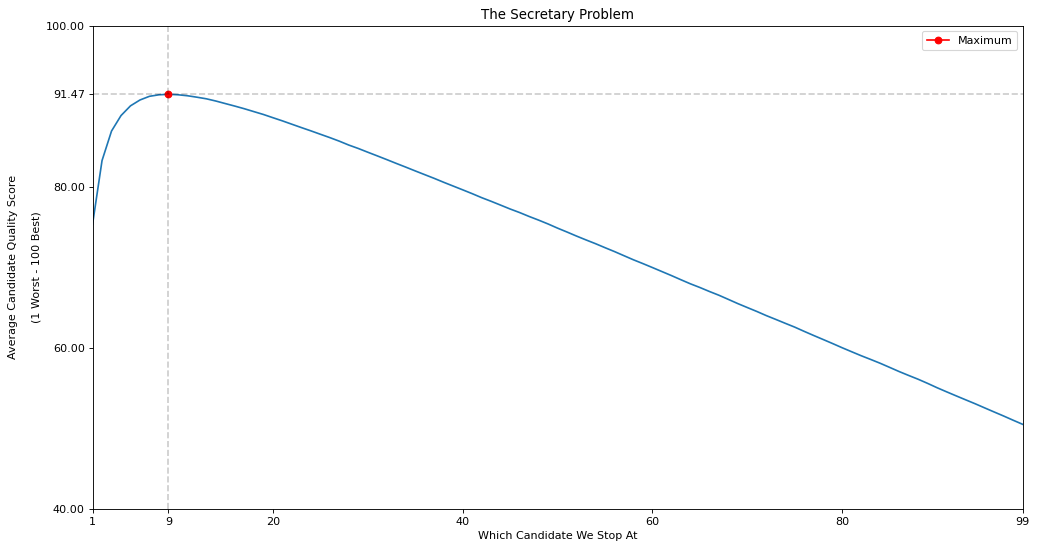

The candidate with the highest average quality is found by making your selection after candidate 9.0
Therefore select after seeing 9.0% of options will on average yield an average candidate score of 91.46532 with 100  being the best possible score


In [39]:
Average = []

for r in Matrix: #Search through our matrix that contains the candidate scores over 100,000 iterations at each 
                 #stopping position and give each position an average candidate score
    Average.append(sum(r)/len(r))#Find average candidate quality for each stopping position


x = np.linspace(1,len(Average),len(Average))
y = Average

plt.figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
plt.title("The Secretary Problem")
plt.xlabel("Which Candidate We Stop At")
plt.ylabel("Average Candidate Quality Score\n \n(1 Worst - 100 Best)")
plt.plot(x, y)
plt.plot(x[y.index(max(y))],(max(y)), '-ro', label = "Maximum")
plt.xlim(1,99)
plt.ylim(40,100)
plt.xticks([1,x[y.index(max(y))],20,40,60,80,99])
plt.yticks([40,60,80,max(y),100])
plt.axvline(x=x[y.index(max(y))], color='black', linestyle='--', alpha = 0.2)
plt.axhline(y=(max(y)), color='black', linestyle='--', alpha = 0.2)
plt.legend(loc="upper right")
plt.show()

print("The candidate with the highest average quality is found by making your selection after candidate",x[y.index(max(y))])
print("Therefore select after seeing {}% of options will on average yield an average candidate score of {}\
 with 100  being the best possible score".format(x[y.index(max(y))],max(y)))

      

Result:

    The strategy that ensures we will find the candidate with the highest average quality is found by making our selection after candidate 9, therefore selecting after seeing 9% of the options. Looking back at our earlier graph where we found the maximum stopping point for finding the best candidate, stopping at 9% instead of 37% decreased our odds of finding the best candidate from 37% to around 22.5%. We can justify this lower ceiling by looking at the graph we just constructed above. On the average candidate quality graph, stopping at 37% yields a score of around 80 out of 100, as opposed to 91.5 if we stop at 9%. The average quality of the candidate we find when stopping after 9% is superior to that of stopping at 37%, even if it means we don't always find the best candidate.

Step 5:
    
    What are the optimal stopping positions if we want to find just a top 20 candidate, or top 10, or top 5? We can use the same criteria to determine the solution to these questions as well. The results are pretty interesting.

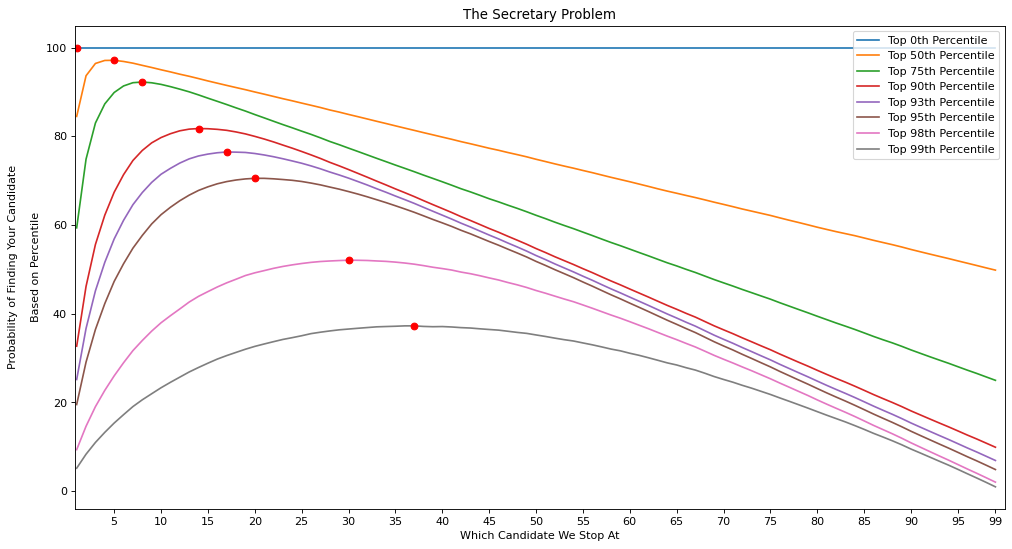

In [63]:
def Plot(K):
    New = []
    for s in Matrix:
        s = list(s)
        New.append(((len([i for i in s if (i)>K]))/len(s))*100)
    return(New)


plt.figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')

for i in [0,50,75,90,93,95,98,99]:
    New = Plot(i)
    x = np.linspace(1,len(New),len(New))
    plt.plot(x, New, label = "Top {}th Percentile".format(i))
    plt.plot(x[New.index(max(New))],max(New), '-ro')
    
plt.title("The Secretary Problem")
plt.xlabel("Which Candidate We Stop At")
plt.ylabel("Probability of Finding Your Candidate\n \nBased on Percentile")
plt.legend(loc='upper right')
c = [i for i in range(0,100,5)]
c.append(99)
plt.xticks(c)
plt.xlim(0.8,100)


plt.show()


Result:
    
    We can take a look at this graph, and see that the more picky we get in regards to quality of candidate that we wish to hire, the less likely we are to succeed, and the longer we should wait before hiring. 
    This makes intuitive sense.

Step 6:
    
    Now lets build a little table that we can use as a guide to tell us when we should stop searching and start hiring for each candidate percentile we may wish to hire in. This table will also tell us what the probability of success is that we find a candidate in that percentile for each stopping position.

In [53]:
Maximum_Stopping_Set_Percentage = []
Maximum_Stopping_Set_Stopping = []

for i in range (0,100):
    
    Maximum_Stopping_Set_Percentage.append(max(Plot(i)))
    Maximum_Stopping_Set_Stopping.append(Plot(i).index(max(Plot(i)))+1)
    
print (Maximum_Stopping_Set_Percentage)
print (Maximum_Stopping_Set_Stopping)

[100.0, 99.98899999999999, 99.967, 99.933, 99.914, 99.895, 99.869, 99.843, 99.81700000000001, 99.79599999999999, 99.765, 99.729, 99.711, 99.67, 99.634, 99.591, 99.548, 99.49900000000001, 99.439, 99.392, 99.361, 99.316, 99.272, 99.236, 99.187, 99.15, 99.112, 99.063, 99.02, 98.96000000000001, 98.89, 98.818, 98.752, 98.682, 98.602, 98.52300000000001, 98.436, 98.356, 98.277, 98.195, 98.124, 98.043, 97.968, 97.887, 97.79299999999999, 97.694, 97.604, 97.491, 97.36200000000001, 97.243, 97.123, 97.011, 96.91199999999999, 96.808, 96.68900000000001, 96.552, 96.404, 96.248, 96.09400000000001, 95.928, 95.761, 95.626, 95.475, 95.296, 95.112, 94.90899999999999, 94.676, 94.433, 94.233, 93.99, 93.742, 93.46900000000001, 93.16499999999999, 92.84599999999999, 92.56299999999999, 92.226, 91.866, 91.444, 91.011, 90.586, 90.089, 89.561, 89.036, 88.446, 87.763, 87.033, 86.197, 85.286, 84.27799999999999, 83.07, 81.748, 80.218, 78.53099999999999, 76.457, 73.881, 70.521, 66.31099999999999, 60.667, 52.0689999999

In [61]:
import pandas as pd

Percentiles = range(0,100,1)

Full_Table = pd.DataFrame({'Percentile of Candidate':Percentiles,
                           'Optimal Stopping Point':Maximum_Stopping_Set_Stopping,
                           'Percentage of Success':Maximum_Stopping_Set_Percentage})

Full_Table


,Percentile of Candidate,Optimal Stopping Point,Percentage of Success
0,0,1,100.000
1,1,1,99.989
2,2,1,99.967
3,3,1,99.933
4,4,2,99.914
...,...,...,...
95,95,20,70.521
96,96,23,66.311
97,97,26,60.667
98,98,30,52.069


Result:
    
    One of the most interesting things about this table is how the probability of finding the candidate in the percentile that you want exponentially decreases the pickier you get. The first few (0th to 4th percentile) are all basically a guarantee that you get a candidate in that percentile. When we look at the last few (95th to 99th perentile) the odds of success go from 70% to 37% by just searching for a slightly better candidate.

Interesting Note:
    
    The reason why we have such a high chance of finding candidates that are low percentiles is since even if we get unlucky with our method and the first candidate that we look at is the best (score 100) then we pass on them and say we will hire the next person that we see that is better (since we already saw the best this means we will look at the rest of the candidates and still not find anyone), we end up just hiring whoever happens to randomly be the last person that we interview. So the odds of us failing require a small chance that we get an amazing candidate to start AND that we have a terrible candidate as our last interview.

Step 7: Visualizing The Cost of Selection

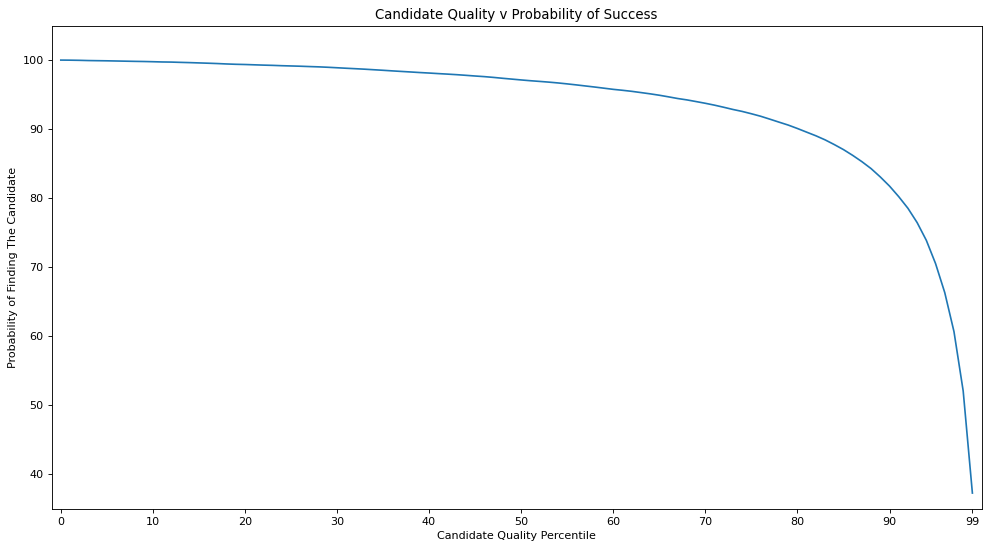

In [70]:
x = Percentiles
y = Maximum_Stopping_Set_Percentage

plt.figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
plt.title("Candidate Quality v Probability of Success")
plt.xlabel("Candidate Quality Percentile")
plt.ylabel("Probability of Finding The Candidate")
plt.plot(x, y)
c = [x for x in range(0,100,10)]
c.append(99)
plt.xticks(c[::-1])
plt.yticks([x for x in range(0,110,10)])
plt.xlim(-1,100)
plt.ylim(35,105)
plt.show()

Result:
    
    Looking at the graph above, we can see that we still have a really good chance of finding a candidate that is in the 90th percentile, and that it is only when we start to look for top 5% or better candidates that we really start to push our luck. The graph does a good job of showing the risk to reward ratio that comes with searching for the best candidate.
    
    All in all, the classic Secretary Probelem has much more layers than initially thought, and by using simulations, we can answer all kinds of questions and find all kinds of optimization points when it comes to finding the quality of candidate we are looking for.